# Simple Neural Network Classification Breast Cancer prediction

In [2]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [3]:
# -----------------------------
# 2. Load Dataset
# -----------------------------
data = load_breast_cancer()
X = data.data               # features
y = data.target             # labels (0 or 1)



In [4]:
print(data.keys)

<built-in method keys of Bunch object at 0x0000022B6A101220>


In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Each row represents one patient.
Each column is a measurement from the tumor cell nuclei in the breast mass image.

These are numerical measurements, such as:

1. mean radius

2. mean texture

3. mean perimeter

4. mean area

5. mean smoothness
…
…

30. worst fractal dimension

These features are derived from a breast mass digitized image.

In [6]:
X.shape     #  560 samples (ie) patients  and 30 features

(569, 30)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# -----------------------------
# 3. Split into Train/Test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [9]:
# -----------------------------
# 4. Scale the data (important for neural networks)
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [10]:
# -----------------------------
# 5. Build Neural Network Model
# -----------------------------
model = Sequential()

# Input + Hidden layer
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))

# Hidden layer
model.add(Dense(8, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))




c:\Users\Yugesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# -----------------------------
# 6. Compile the model
# -----------------------------
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [12]:
# -----------------------------
# 7. Train the model
# -----------------------------
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)



Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8789 - loss: 0.5185 - val_accuracy: 0.9348 - val_loss: 0.3936
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9407 - loss: 0.3724 - val_accuracy: 0.9348 - val_loss: 0.2900
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9465 - loss: 0.2844 - val_accuracy: 0.9348 - val_loss: 0.2321
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.2294 - val_accuracy: 0.9348 - val_loss: 0.1944
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9545 - loss: 0.1857 - val_accuracy: 0.9348 - val_loss: 0.1692
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.1405 - val_accuracy: 0.9348 - val_loss: 0.1514
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.1178 - val_accuracy: 0.9348 - val_loss: 0.1400
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9690 - loss: 0.1143 - val_accuracy: 0.9348 - val_loss:

In [13]:
# -----------------------------
# 8. Evaluate on Test Data
# -----------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9707 - loss: 0.0808 
Test Accuracy: 0.9736841917037964


In [14]:
# -----------------------------
# 9. Make a Prediction
# -----------------------------
sample = X_test[0].reshape(1, -1)
pred = model.predict(sample)
print("Predicted Probability:", pred[0][0])
print("Predicted Class:", 1 if pred[0][0] > 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Probability: 0.9253677
Predicted Class: 1


In [17]:
# import confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = (model.predict(X_test) > 0.5).astype(float)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


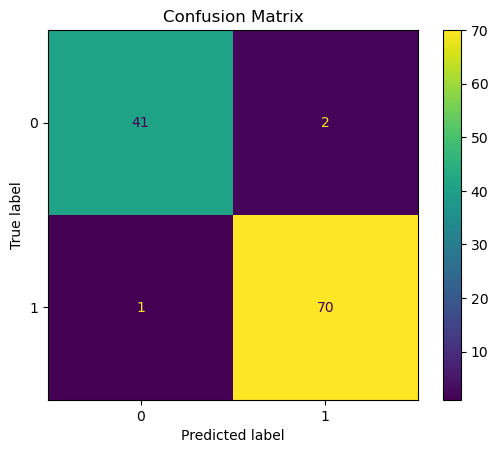

In [18]:
# ---------------------------------
# 10. Generate Confusion Matrix
# ---------------------------------
cm = confusion_matrix(y_test, y_pred)

# ---------------------------------
# 11. Display Confusion Matrix
# ---------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()